In [1]:
!pip install ..

Processing /home/chriamue/workspace/rusty_rails
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for rusty-rails-py: filename=rusty_rails_py-0.1.0-cp38-cp38-linux_x86_64.whl size=1182391 sha256=16708d97e4854a4d6a10c5b7e61b939b345dc7d562194f90cea7ddcc50fded7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-80l2q5i0/wheels/ec/de/b9/aa13d5c7f1d6532993ac5d4bdac2b033533aa1ccbe0649d9af
Successfully built rusty-rails-py
  Attempting uninstall: rusty-rails-py
    Found existing installation: rusty-rails-py 0.1.0
    Uninstalling rusty-rails-py-0.1.0:
      Successfully uninstalled rusty-rails-py-0.1.0


In [2]:
import rusty_rails_py

In [3]:
help(rusty_rails_py)

Help on package rusty_rails_py:

rusty_rails_py = <module 'rusty_rails_py' from '/home/chriamue/wo...hon3.8/site-packages/rusty_rails_py/__init__.py'>


In [4]:
from rusty_rails_py import World

In [5]:
tracks = 42
switches = 3
agents = 2
world = World(tracks, switches, agents)

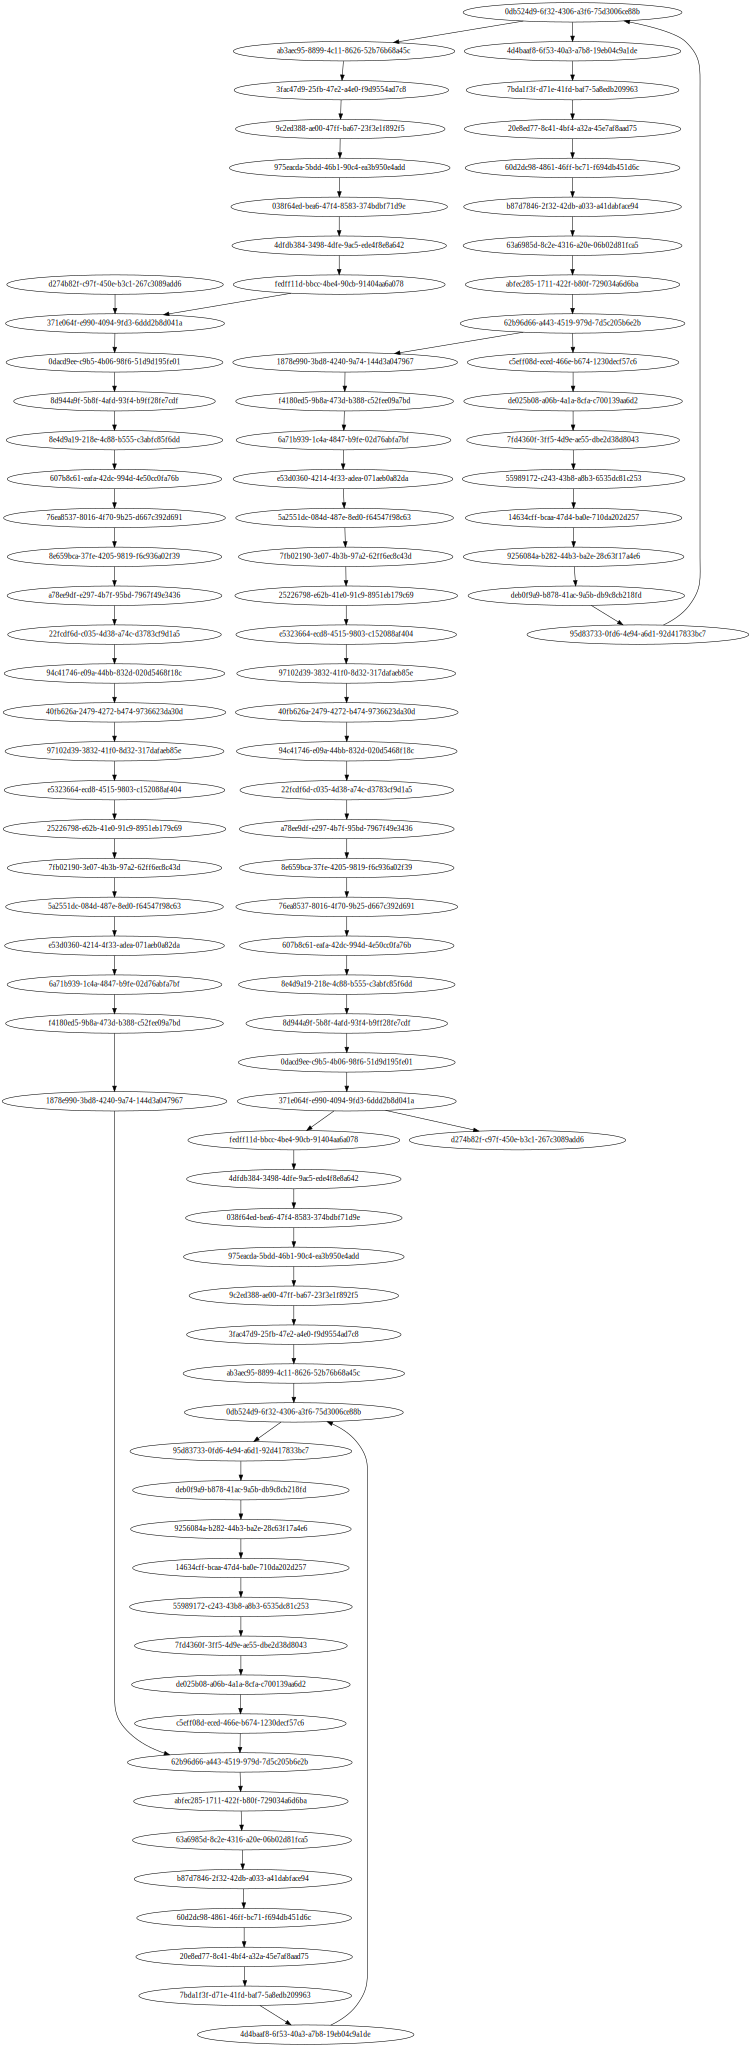

In [6]:
import networkx as nx
from graphviz import Source
graph = Source(world.dot())
graph

In [7]:
world.agents()

['b64c35f8-e412-47bf-883e-82d64d183227',
 'e1225384-4830-4080-a41d-dace0a807454']

In [8]:
print(world.value())
world.update_motion(2)
world.update_state(1)
for i in range(10):
    world.update()
print(world.value())

2.0
11.0


In [9]:
for i in range(7):
    world.update()
print(world.value())

221.0


In [10]:
world.flat()

[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]

# Gym Env
Lets create an environment for training.

In [11]:
from rusty_rails_py import RustyRailsEnv
import numpy as np

In [12]:
env = RustyRailsEnv(world)

In [13]:
env.reset()
env.step(action=1)

(array([  0.,   1.,   1.,  18., -18.,   0.,   0.]),
 24.0,
 False,
 {'b64c35f8-e412-47bf-883e-82d64d183227': ('7fb02190-3e07-4b3b-97a2-62ff6ec8c43d',
   '5a2551dc-084d-487e-8ed0-f64547f98c63'),
  'e1225384-4830-4080-a41d-dace0a807454': ('00000000-0000-0000-0000-000000000000',
   '00000000-0000-0000-0000-000000000000')})

In [14]:
env.reset()

array([0., 1., 1., 0., 0., 0., 0.])

In [15]:
env.step(action=3)

(array([  0.,   1.,   1.,  20., -20.,   0.,   0.]),
 2.0,
 False,
 {'b64c35f8-e412-47bf-883e-82d64d183227': ('e5323664-ecd8-4515-9803-c152088af404',
   '25226798-e62b-41e0-91c9-8951eb179c69'),
  'e1225384-4830-4080-a41d-dace0a807454': ('00000000-0000-0000-0000-000000000000',
   '00000000-0000-0000-0000-000000000000')})

In [16]:
env.current_world.agent_position(world.agents()[0])

('e5323664-ecd8-4515-9803-c152088af404',
 '25226798-e62b-41e0-91c9-8951eb179c69')

In [17]:
for _ in range(10000):
    env.render()
    env.step(env.action_space.sample())

Render:  [0.0, 1.0, 1.0, 20.0, -20.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 21.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 21.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, 1.0, 10.0, -10.0]
Render:  [0.0, 1.0, 1.0, 19.0, 1.0, 11.0, -1.0]
Render:  [0.0, 1.0, 1.0, 18.0, 1.0, 12.0, -1.0]
Render:  [1.0, 1.0, 1.0, 17.0, 1.0, 13.0, -1.0]
Render:  [1.0, 1.0, 1.0, 17.0, 0.0, 14.0, -1.0]
Render:  [1.0, 1.0, 1.0, 16.0, 1.0, 15.0, -1.0]
Render:  [1.0, 1.0, 1.0, 17.0, -1.0, 16.0, -1.0]
Render:  [1.0, 1.0, 1.0, 18.0, -1.0, 16.0, 0.0]
Render:  [1.0, 1.0, 1.0, 17.0, 1.0, 16.0, 0.0]
Render:  [1.0, 1.0, 1.0, 18.0, -1.0, 16.0, 0.0]
Render:  [1.0, 1.0, 1.0, 19.0, -1.0, 17.0, -1.0]
Render:  [1.0, 1.0, 1.0, 20.0, -1.0, 18.0, -1.0]
Render:  [1.0, 1.0, 1.0, 20.0, 0.0, 19.0, -1.0]
Render:  [1.0, 1.0, 1.0, 20.0, 0.0, 19.0, 0.0]
Render:  [1.0, 1.0, 1.0, 20.0, 0.0, 19.0, 0.0]
Render:  [1.0, 1.0, 1.0, 21.0, -1.0, 19.0, 0.0]
Render:  [1.0, 0.0, 1.0, 22.0, -1.0, 19.0, 

Render:  [1.0, 1.0, 0.0, 13.0, 1.0, 19.0, 1.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 18.0, 1.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 17.0, 1.0]
Render:  [1.0, 0.0, 0.0, 13.0, 0.0, 16.0, 1.0]
Render:  [1.0, 0.0, 1.0, 13.0, 0.0, 15.0, 1.0]
Render:  [1.0, 0.0, 1.0, 13.0, 0.0, 14.0, 1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 0.0, 13.0, 1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 0.0, 12.0, 1.0]
Render:  [1.0, 0.0, 1.0, 13.0, 0.0, 11.0, 1.0]
Render:  [1.0, 0.0, 1.0, 12.0, 1.0, 10.0, 1.0]
Render:  [1.0, 0.0, 1.0, 11.0, 1.0, 10.0, 0.0]
Render:  [1.0, 0.0, 1.0, 10.0, 1.0, 10.0, 0.0]
Render:  [1.0, 0.0, 0.0, 9.0, 1.0, 10.0, 0.0]
Render:  [1.0, 0.0, 0.0, 10.0, -1.0, 10.0, 0.0]
Render:  [1.0, 0.0, 0.0, 11.0, -1.0, 10.0, 0.0]
Render:  [1.0, 0.0, 0.0, 12.0, -1.0, 10.0, 0.0]
Render:  [1.0, 0.0, 0.0, 13.0, -1.0, 11.0, -1.0]
Render:  [1.0, 0.0, 0.0, 14.0, -1.0, 12.0, -1.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 13.0, -1.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 14.0, -1.0]
Render:  [1.0, 0.0, 0.0, 15.0, -1.0, 15.0, -1.0]
Ren

Render:  [1.0, 1.0, 1.0, 21.0, -1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 21.0, 1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 20.0, 1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 21.0, -1.0, 0.0, 0.0]
Render:  [1.0, 0.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [1.0, 0.0, 1.0, 21.0, 1.0, 12.0, -12.0]
Render:  [1.0, 0.0, 1.0, 22.0, -1.0, 11.0, 1.0]
Render:  [1.0, 0.0, 1.0, 21.0, 1.0, 10.0, 1.0]
Render:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, -20.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 21.0, -1.0, 22.0, -22.0]
Render:  [0.0, 1.0, 0.0, 22.0, -1.0, 21.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, 1.0, 20.0, 1.0]
Render:  [0.0, 1.0, 0.0, 20.0, 1.0, 19.0, 1.0]
Render:  [1.0, 1.0, 0.0, 19.0, 1.0, 18.0, 1.0]
Render:  [1.0, 1.0, 0.0, 18.0, 1.0, 17.0, 1.0]
Render:  [1.0, 0.0, 0.0, 17.0, 1.0, 16.0, 1.0]
Render:  [1.0, 0.0, 0.0, 16.0, 1.0, 15.0, 1.0]
Render:  [1.0, 0.0, 0.0, 16.0, 0.0, 14.0, 1.0]
Render:  [0.0, 0.0, 0.0, 16.0, 0.0, 13.0, 1.0]
Render:  

Render:  [1.0, 0.0, 0.0, 6.0, 1.0, 15.0, 1.0]
Render:  [1.0, 0.0, 0.0, 5.0, 1.0, 14.0, 1.0]
Render:  [1.0, 0.0, 0.0, 5.0, 0.0, 13.0, 1.0]
Render:  [1.0, 0.0, 0.0, 5.0, 0.0, 13.0, 0.0]
Render:  [1.0, 0.0, 0.0, 5.0, 0.0, 14.0, -1.0]
Render:  [1.0, 0.0, 0.0, 5.0, 0.0, 14.0, 0.0]
Render:  [1.0, 0.0, 0.0, 5.0, 0.0, 14.0, 0.0]
Render:  [1.0, 1.0, 0.0, 5.0, 0.0, 14.0, 0.0]
Render:  [1.0, 1.0, 0.0, 5.0, 0.0, 14.0, 0.0]
Render:  [1.0, 1.0, 0.0, 5.0, 0.0, 14.0, 0.0]
Render:  [1.0, 1.0, 0.0, 5.0, 0.0, 15.0, -1.0]
Render:  [1.0, 1.0, 0.0, 5.0, 0.0, 16.0, -1.0]
Render:  [1.0, 1.0, 0.0, 5.0, 0.0, 16.0, 0.0]
Render:  [0.0, 1.0, 0.0, 5.0, 0.0, 16.0, 0.0]
Render:  [0.0, 1.0, 0.0, 5.0, 0.0, 16.0, 0.0]
Render:  [0.0, 1.0, 0.0, 5.0, 0.0, 17.0, -1.0]
Render:  [0.0, 1.0, 0.0, 5.0, 0.0, 16.0, 1.0]
Render:  [0.0, 1.0, 0.0, 5.0, 0.0, 15.0, 1.0]
Render:  [0.0, 1.0, 1.0, 5.0, 0.0, 14.0, 1.0]
Render:  [1.0, 1.0, 1.0, 5.0, 0.0, 13.0, 1.0]
Render:  [1.0, 1.0, 1.0, 5.0, 0.0, 12.0, 1.0]
Render:  [1.0, 1.0, 1.0, 5.0, 

Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 18.0, 1.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 17.0, 1.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 18.0, -1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 0.0, 19.0, -1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 0.0, 20.0, -1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 0.0, 21.0, -1.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 22.0, -1.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [1.0, 0.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [1.0, 0.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [0.0, 0.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [0.0, 0.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [0.0, 0.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [0.0, 1.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [1.0, 1.0, 0.0, 13.0, 0.0, 22.0, 0.0]
Render:  [1.0, 1.0, 0.0, 14.0, -1.0, 22.0, 0.0]
Render:  [1.0, 1.0, 0.0, 15.0, -1.0, 23.0, -1.0]
Render:  [1.0, 1.0, 0.0, 16.0, -1.0, 22.0, 1.0]
Render:  [0.0, 1.0, 0.0, 17.0, -1.0, 21.0, 1.0]
Ren

Render:  [0.0, 0.0, 0.0, 18.0, 0.0, 6.0, 0.0]
Render:  [0.0, 0.0, 0.0, 18.0, 0.0, 6.0, 0.0]
Render:  [0.0, 0.0, 0.0, 18.0, 0.0, 7.0, -1.0]
Render:  [0.0, 0.0, 1.0, 18.0, 0.0, 8.0, -1.0]
Render:  [0.0, 0.0, 1.0, 19.0, -1.0, 9.0, -1.0]
Render:  [0.0, 0.0, 1.0, 20.0, -1.0, 10.0, -1.0]
Render:  [0.0, 0.0, 1.0, 19.0, 1.0, 11.0, -1.0]
Render:  [0.0, 0.0, 1.0, 20.0, -1.0, 12.0, -1.0]
Render:  [1.0, 0.0, 1.0, 21.0, -1.0, 11.0, 1.0]
Render:  [1.0, 0.0, 1.0, 22.0, -1.0, 10.0, 1.0]
Render:  [1.0, 1.0, 1.0, 21.0, 1.0, 9.0, 1.0]
Render:  [1.0, 1.0, 1.0, 20.0, 1.0, 8.0, 1.0]
Render:  [1.0, 1.0, 1.0, 19.0, 1.0, 7.0, 1.0]
Render:  [1.0, 1.0, 1.0, 18.0, 1.0, 8.0, -1.0]
Render:  [1.0, 0.0, 1.0, 17.0, 1.0, 9.0, -1.0]
Render:  [1.0, 0.0, 1.0, 16.0, 1.0, 10.0, -1.0]
Render:  [1.0, 0.0, 1.0, 17.0, -1.0, 11.0, -1.0]
Render:  [1.0, 1.0, 1.0, 18.0, -1.0, 12.0, -1.0]
Render:  [1.0, 0.0, 1.0, 19.0, -1.0, 11.0, 1.0]
Render:  [1.0, 0.0, 1.0, 20.0, -1.0, 10.0, 1.0]
Render:  [1.0, 0.0, 1.0, 20.0, 0.0, 9.0, 1.0]
Rend

Render:  [0.0, 0.0, 1.0, 19.0, -1.0, 10.0, 1.0]
Render:  [0.0, 0.0, 1.0, 20.0, -1.0, 10.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, -1.0, 9.0, 1.0]
Render:  [0.0, 0.0, 1.0, 22.0, -1.0, 8.0, 1.0]
Render:  [0.0, 0.0, 1.0, 21.0, 1.0, 7.0, 1.0]
Render:  [0.0, 0.0, 1.0, 20.0, 1.0, 8.0, -1.0]
Render:  [0.0, 0.0, 1.0, 19.0, 1.0, 9.0, -1.0]
Render:  [0.0, 0.0, 1.0, 18.0, 1.0, 10.0, -1.0]
Render:  [0.0, 0.0, 1.0, 17.0, 1.0, 11.0, -1.0]
Render:  [0.0, 0.0, 1.0, 16.0, 1.0, 12.0, -1.0]
Render:  [0.0, 0.0, 1.0, 15.0, 1.0, 13.0, -1.0]
Render:  [1.0, 0.0, 1.0, 14.0, 1.0, 14.0, -1.0]
Render:  [1.0, 0.0, 1.0, 13.0, 1.0, 15.0, -1.0]
Render:  [1.0, 0.0, 1.0, 13.0, 0.0, 16.0, -1.0]
Render:  [1.0, 0.0, 1.0, 13.0, 0.0, 15.0, 1.0]
Render:  [1.0, 0.0, 1.0, 5.0, 8.0, 14.0, 1.0]
Render:  [1.0, 0.0, 1.0, 5.0, 0.0, 13.0, 1.0]
Render:  [1.0, 0.0, 1.0, 5.0, 0.0, 12.0, 1.0]
Render:  [1.0, 0.0, 1.0, 5.0, 0.0, 11.0, 1.0]
Render:  [1.0, 0.0, 1.0, 13.0, -8.0, 10.0, 1.0]
Render:  [1.0, 0.0, 0.0, 14.0, -1.0, 9.0, 1.0]
Render: 

Render:  [0.0, 1.0, 0.0, 20.0, 1.0, 5.0, 0.0]
Render:  [1.0, 1.0, 0.0, 19.0, 1.0, 5.0, 0.0]
Render:  [1.0, 1.0, 0.0, 18.0, 1.0, 5.0, 0.0]
Render:  [1.0, 1.0, 0.0, 17.0, 1.0, 5.0, 0.0]
Render:  [1.0, 1.0, 1.0, 16.0, 1.0, 5.0, 0.0]
Render:  [1.0, 1.0, 1.0, 15.0, 1.0, 6.0, -1.0]
Render:  [1.0, 1.0, 0.0, 14.0, 1.0, 7.0, -1.0]
Render:  [1.0, 1.0, 0.0, 15.0, -1.0, 8.0, -1.0]
Render:  [1.0, 1.0, 0.0, 16.0, -1.0, 9.0, -1.0]
Render:  [1.0, 1.0, 0.0, 17.0, -1.0, 10.0, -1.0]
Render:  [1.0, 1.0, 0.0, 18.0, -1.0, 10.0, 0.0]
Render:  [1.0, 1.0, 0.0, 18.0, 0.0, 10.0, 0.0]
Render:  [1.0, 1.0, 0.0, 18.0, 0.0, 10.0, 0.0]
Render:  [0.0, 1.0, 0.0, 18.0, 0.0, 10.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, 0.0, 10.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, 0.0, 10.0, 0.0]
Render:  [0.0, 1.0, 0.0, 18.0, 0.0, 10.0, 0.0]
Render:  [0.0, 1.0, 0.0, 18.0, 0.0, 10.0, 0.0]
Render:  [0.0, 1.0, 0.0, 18.0, 0.0, 11.0, -1.0]
Render:  [0.0, 1.0, 0.0, 17.0, 1.0, 12.0, -1.0]
Render:  [0.0, 1.0, 0.0, 16.0, 1.0, 13.0, -1.0]
Render:  [

Render:  [1.0, 1.0, 0.0, 17.0, 1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 0.0, 16.0, 1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 0.0, 15.0, 1.0, 15.0, -15.0]
Render:  [1.0, 1.0, 0.0, 14.0, 1.0, 14.0, 1.0]
Render:  [1.0, 0.0, 0.0, 13.0, 1.0, 13.0, 1.0]
Render:  [1.0, 0.0, 0.0, 14.0, -1.0, 12.0, 1.0]
Render:  [1.0, 0.0, 0.0, 15.0, -1.0, 11.0, 1.0]
Render:  [1.0, 0.0, 0.0, 16.0, -1.0, 10.0, 1.0]
Render:  [1.0, 0.0, 1.0, 17.0, -1.0, 9.0, 1.0]
Render:  [1.0, 0.0, 1.0, 18.0, -1.0, 9.0, 0.0]
Render:  [1.0, 0.0, 1.0, 18.0, 0.0, 9.0, 0.0]
Render:  [1.0, 0.0, 1.0, 18.0, 0.0, 10.0, -1.0]
Render:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, -20.0, 16.0, -16.0]
Render:  [0.0, 1.0, 1.0, 21.0, -1.0, 15.0, 1.0]
Render:  [0.0, 1.0, 1.0, 22.0, -1.0, 14.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, 1.0, 13.0, 1.0]
Render:  [0.0, 1.0, 0.0, 20.0, 1.0, 12.0, 1.0]
Render:  [0.0, 1.0, 0.0, 19.0, 1.0, 11.0, 1.0]
Render:  [0.0, 0.0, 0.0, 18.0, 1.0, 10.0, 1.0]
Render:  [0.0, 0.0, 0.0, 17.0, 1.0, 9.0, 1.0]
Render:

Render:  [0.0, 0.0, 0.0, 21.0, 1.0, 11.0, 0.0]
Render:  [0.0, 0.0, 0.0, 20.0, 1.0, 10.0, 1.0]
Render:  [0.0, 0.0, 0.0, 19.0, 1.0, 9.0, 1.0]
Render:  [1.0, 0.0, 0.0, 18.0, 1.0, 8.0, 1.0]
Render:  [1.0, 0.0, 0.0, 17.0, 1.0, 9.0, -1.0]
Render:  [1.0, 1.0, 0.0, 16.0, 1.0, 10.0, -1.0]
Render:  [1.0, 1.0, 0.0, 15.0, 1.0, 11.0, -1.0]
Render:  [1.0, 1.0, 0.0, 14.0, 1.0, 10.0, 1.0]
Render:  [1.0, 1.0, 0.0, 15.0, -1.0, 9.0, 1.0]
Render:  [1.0, 1.0, 0.0, 16.0, -1.0, 10.0, -1.0]
Render:  [1.0, 1.0, 1.0, 17.0, -1.0, 11.0, -1.0]
Render:  [1.0, 1.0, 1.0, 18.0, -1.0, 12.0, -1.0]
Render:  [1.0, 0.0, 1.0, 19.0, -1.0, 13.0, -1.0]
Render:  [1.0, 0.0, 1.0, 20.0, -1.0, 13.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, -1.0, 13.0, 0.0]
Render:  [0.0, 0.0, 0.0, 22.0, -1.0, 13.0, 0.0]
Render:  [0.0, 0.0, 0.0, 21.0, 1.0, 14.0, -1.0]
Render:  [0.0, 0.0, 0.0, 20.0, 1.0, 15.0, -1.0]
Render:  [0.0, 0.0, 0.0, 19.0, 1.0, 16.0, -1.0]
Render:  [0.0, 0.0, 0.0, 18.0, 1.0, 17.0, -1.0]
Render:  [0.0, 0.0, 0.0, 17.0, 1.0, 18.0, -1.

Render:  [0.0, 0.0, 0.0, 14.0, 0.0, 12.0, 0.0]
Render:  [0.0, 0.0, 0.0, 13.0, 1.0, 12.0, 0.0]
Render:  [0.0, 0.0, 0.0, 14.0, -1.0, 12.0, 0.0]
Render:  [0.0, 0.0, 0.0, 15.0, -1.0, 13.0, -1.0]
Render:  [0.0, 0.0, 0.0, 14.0, 1.0, 14.0, -1.0]
Render:  [0.0, 0.0, 0.0, 15.0, -1.0, 15.0, -1.0]
Render:  [0.0, 0.0, 0.0, 16.0, -1.0, 16.0, -1.0]
Render:  [0.0, 0.0, 1.0, 17.0, -1.0, 17.0, -1.0]
Render:  [0.0, 0.0, 1.0, 18.0, -1.0, 16.0, 1.0]
Render:  [0.0, 0.0, 1.0, 19.0, -1.0, 15.0, 1.0]
Render:  [0.0, 0.0, 1.0, 20.0, -1.0, 14.0, 1.0]
Render:  [0.0, 0.0, 1.0, 19.0, 1.0, 13.0, 1.0]
Render:  [0.0, 0.0, 1.0, 20.0, -1.0, 12.0, 1.0]
Render:  [0.0, 0.0, 1.0, 21.0, -1.0, 11.0, 1.0]
Render:  [0.0, 0.0, 1.0, 22.0, -1.0, 10.0, 1.0]
Render:  [0.0, 0.0, 1.0, 21.0, 1.0, 9.0, 1.0]
Render:  [0.0, 1.0, 1.0, 20.0, 1.0, 8.0, 1.0]
Render:  [0.0, 1.0, 1.0, 19.0, 1.0, 7.0, 1.0]
Render:  [0.0, 1.0, 1.0, 18.0, 1.0, 7.0, 0.0]
Render:  [0.0, 1.0, 0.0, 17.0, 1.0, 7.0, 0.0]
Render:  [0.0, 1.0, 0.0, 17.0, 0.0, 7.0, 0.0]
Ren

Render:  [0.0, 1.0, 1.0, 14.0, -1.0, 8.0, 1.0]
Render:  [0.0, 1.0, 1.0, 15.0, -1.0, 8.0, 0.0]
Render:  [0.0, 1.0, 1.0, 16.0, -1.0, 8.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, -1.0, 8.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, -1.0, 9.0, -1.0]
Render:  [0.0, 1.0, 1.0, 19.0, -1.0, 9.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, -1.0, 9.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, -1.0, 9.0, 0.0]
Render:  [0.0, 0.0, 1.0, 22.0, -1.0, 9.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, 1.0, 9.0, 0.0]
Render:  [0.0, 0.0, 1.0, 20.0, 1.0, 8.0, 1.0]
Render:  [0.0, 0.0, 1.0, 19.0, 1.0, 7.0, 1.0]
Render:  [0.0, 1.0, 1.0, 18.0, 1.0, 6.0, 1.0]
Render:  [0.0, 1.0, 0.0, 17.0, 1.0, 5.0, 1.0]
Render:  [0.0, 1.0, 0.0, 16.0, 1.0, 19.0, -14.0]
Render:  [0.0, 1.0, 1.0, 15.0, 1.0, 20.0, -1.0]
Render:  [0.0, 1.0, 1.0, 15.0, 0.0, 21.0, -1.0]
Render:  [0.0, 1.0, 1.0, 15.0, 0.0, 21.0, 0.0]
Render:  [1.0, 1.0, 1.0, 15.0, 0.0, 21.0, 0.0]
Render:  [1.0, 1.0, 1.0, 15.0, 0.0, 20.0, 1.0]
Render:  [1.0, 1.0, 1.0, 15.0, 0.0, 19.0, 1.0]
Render:  [1.0

Render:  [0.0, 0.0, 1.0, 3.0, 1.0, 24.0, -12.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 23.0, 1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 22.0, 1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 21.0, 1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 22.0, -1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 21.0, 1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 22.0, -1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 23.0, -1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 23.0, 0.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 23.0, 0.0]
Render:  [0.0, 0.0, 1.0, 3.0, 0.0, 23.0, 0.0]
Render:  [0.0, 0.0, 0.0, 3.0, 0.0, 23.0, 0.0]
Render:  [0.0, 0.0, 0.0, 4.0, -1.0, 23.0, 0.0]
Render:  [0.0, 1.0, 0.0, 5.0, -1.0, 23.0, 0.0]
Render:  [0.0, 0.0, 0.0, 6.0, -1.0, 23.0, 0.0]
Render:  [0.0, 0.0, 0.0, 7.0, -1.0, 23.0, 0.0]
Render:  [0.0, 0.0, 0.0, 8.0, -1.0, 23.0, 0.0]
Render:  [0.0, 0.0, 1.0, 9.0, -1.0, 23.0, 0.0]
Render:  [1.0, 0.0, 1.0, 10.0, -1.0, 23.0, 0.0]
Render:  [0.0, 0.0, 1.0, 11.0, -1.0, 23.0, 0.0]
Render:  [0.0, 0.0, 1.0, 12.0, -1.0, 24.0, -1.0]
Render:  [0.0, 0

Render:  [0.0, 0.0, 1.0, 14.0, -1.0, 2.0, 0.0]
Render:  [0.0, 0.0, 1.0, 15.0, -1.0, 1.0, 1.0]
Render:  [0.0, 0.0, 1.0, 15.0, 0.0, 1.0, 1.0]
Render:  [0.0, 0.0, 1.0, 15.0, 0.0, 5.0, -4.0]
Render:  [0.0, 0.0, 1.0, 15.0, 0.0, 6.0, -1.0]
Render:  [0.0, 0.0, 1.0, 14.0, 1.0, 7.0, -1.0]
Render:  [0.0, 0.0, 1.0, 14.0, 0.0, 8.0, -1.0]
Render:  [0.0, 0.0, 1.0, 14.0, 0.0, 7.0, 1.0]
Render:  [1.0, 0.0, 1.0, 14.0, 0.0, 6.0, 1.0]
Render:  [1.0, 0.0, 1.0, 14.0, 0.0, 5.0, 1.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 4.0, 1.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 3.0, 1.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 2.0, 1.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 2.0, 0.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 1.0, 1.0]
Render:  [0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 1.0]
Render:  [0.0, 1.0, 0.0, 14.0, 0.0, 4.0, -4.0]
Render:  [0.0, 1.0, 1.0, 14.0, 0.0, 5.0, -1.0]
Render:  [0.0, 1.0, 1.0, 14.0, 0.0, 6.0, -1.0]
Render:  [0.0, 1.0, 1.0, 14.0, 0.0, 6.0, -1.0]
Render:  [0.0, 1.0, 1.0, 14.0, 0.0, 1.0, 5.0]
Render:  [0.0, 1.0, 1.0,

Render:  [1.0, 0.0, 1.0, 19.0, -1.0, 17.0, 0.0]
Render:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, -20.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 21.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 21.0, 1.0, 5.0, -5.0]
Render:  [0.0, 1.0, 1.0, 20.0, 1.0, 4.0, 1.0]
Render:  [0.0, 1.0, 1.0, 19.0, 1.0, 3.0, 1.0]
Render:  [0.0, 1.0, 1.0, 18.0, 1.0, 2.0, 1.0]
Render:  [0.0, 1.0, 1.0, 17.0, 1.0, 2.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 2.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 2.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 3.0, -1.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 3.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 2.0, 1.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 1.0, 1.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 0.0, 1.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 7.0, -7.0]
Render:  [0.0, 1.0, 1.0, 17.0, 0.0, 8.0, -1.0]
Render:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 20.0, -20.0, 0.0, 0.0]
Render:  [0.0, 0.0, 0.0,

Render:  [0.0, 1.0, 1.0, 10.0, 0.0, 7.0, 16.0]
Render:  [0.0, 1.0, 1.0, 10.0, 0.0, 7.0, 16.0]
Render:  [0.0, 1.0, 1.0, 10.0, 0.0, 10.0, -3.0]
Render:  [0.0, 1.0, 1.0, 10.0, 0.0, 11.0, -1.0]
Render:  [0.0, 1.0, 1.0, 10.0, 0.0, 11.0, 0.0]
Render:  [0.0, 1.0, 1.0, 11.0, -1.0, 11.0, 0.0]
Render:  [0.0, 1.0, 1.0, 12.0, -1.0, 11.0, 0.0]
Render:  [0.0, 1.0, 1.0, 33.0, -21.0, 11.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, 13.0, 12.0, -1.0]
Render:  [0.0, 1.0, 1.0, 21.0, -1.0, 13.0, -1.0]
Render:  [0.0, 1.0, 1.0, 22.0, -1.0, 14.0, -1.0]
Render:  [1.0, 1.0, 1.0, 21.0, 1.0, 15.0, -1.0]
Render:  [1.0, 1.0, 0.0, 20.0, 1.0, 16.0, -1.0]
Render:  [1.0, 1.0, 0.0, 19.0, 1.0, 17.0, -1.0]
Render:  [1.0, 1.0, 0.0, 18.0, 1.0, 17.0, 0.0]
Render:  [1.0, 1.0, 0.0, 17.0, 1.0, 17.0, 0.0]
Render:  [1.0, 0.0, 0.0, 16.0, 1.0, 17.0, 0.0]
Render:  [1.0, 0.0, 0.0, 15.0, 1.0, 17.0, 0.0]
Render:  [1.0, 0.0, 0.0, 14.0, 1.0, 17.0, 0.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 17.0, 0.0]
Render:  [1.0, 0.0, 0.0, 14.0, 0.0, 17.0, 0.0

Render:  [1.0, 0.0, 0.0, 17.0, 0.0, 5.0, 1.0]
Render:  [1.0, 0.0, 0.0, 16.0, 1.0, 4.0, 1.0]
Render:  [0.0, 0.0, 0.0, 15.0, 1.0, 14.0, -10.0]
Render:  [1.0, 0.0, 0.0, 14.0, 1.0, 15.0, -1.0]
Render:  [0.0, 0.0, 0.0, 13.0, 1.0, 16.0, -1.0]
Render:  [0.0, 0.0, 0.0, 12.0, 1.0, 17.0, -1.0]
Render:  [0.0, 1.0, 0.0, 11.0, 1.0, 18.0, -1.0]
Render:  [0.0, 1.0, 0.0, 10.0, 1.0, 19.0, -1.0]
Render:  [0.0, 1.0, 0.0, 11.0, -1.0, 20.0, -1.0]
Render:  [0.0, 1.0, 0.0, 12.0, -1.0, 21.0, -1.0]
Render:  [0.0, 1.0, 0.0, 11.0, 1.0, 22.0, -1.0]
Render:  [0.0, 1.0, 0.0, 10.0, 1.0, 23.0, -1.0]
Render:  [0.0, 1.0, 1.0, 9.0, 1.0, 22.0, 1.0]
Render:  [0.0, 1.0, 1.0, 8.0, 1.0, 23.0, -1.0]
Render:  [0.0, 1.0, 0.0, 7.0, 1.0, 22.0, 1.0]
Render:  [0.0, 1.0, 0.0, 8.0, -1.0, 21.0, 1.0]
Render:  [0.0, 1.0, 0.0, 9.0, -1.0, 20.0, 1.0]
Render:  [0.0, 1.0, 0.0, 10.0, -1.0, 21.0, -1.0]
Render:  [0.0, 1.0, 0.0, 11.0, -1.0, 21.0, 0.0]
Render:  [0.0, 0.0, 0.0, 12.0, -1.0, 21.0, 0.0]
Render:  [0.0, 0.0, 0.0, 13.0, -1.0, 20.0, 1.0]

Render:  [0.0, 1.0, 0.0, 21.0, 0.0, 14.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, 0.0, 13.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, 0.0, 12.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, 0.0, 11.0, 1.0]
Render:  [0.0, 1.0, 1.0, 21.0, 0.0, 10.0, 1.0]
Render:  [0.0, 1.0, 1.0, 21.0, 0.0, 9.0, 1.0]
Render:  [0.0, 1.0, 1.0, 21.0, 0.0, 8.0, 1.0]
Render:  [0.0, 1.0, 1.0, 22.0, -1.0, 7.0, 1.0]
Render:  [0.0, 1.0, 1.0, 21.0, 1.0, 8.0, -1.0]
Render:  [0.0, 1.0, 0.0, 20.0, 1.0, 9.0, -1.0]
Render:  [0.0, 1.0, 1.0, 19.0, 1.0, 8.0, 1.0]
Render:  [0.0, 1.0, 1.0, 20.0, -1.0, 7.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, -1.0, 6.0, 1.0]
Render:  [0.0, 1.0, 0.0, 22.0, -1.0, 5.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, 1.0, 4.0, 1.0]
Render:  [0.0, 1.0, 0.0, 20.0, 1.0, 3.0, 1.0]
Render:  [0.0, 1.0, 0.0, 21.0, -1.0, 2.0, 1.0]
Render:  [0.0, 0.0, 0.0, 22.0, -1.0, 1.0, 1.0]
Render:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, -20.0, 16.0, -16.0]
Render:  [1.0, 1.0, 1.0, 21.0, -1.0, 17.0, -1.0]
Render:  [1.0,

Render:  [0.0, 1.0, 1.0, 20.0, 1.0, 20.0, -1.0]
Render:  [0.0, 1.0, 1.0, 19.0, 1.0, 21.0, -1.0]
Render:  [0.0, 1.0, 1.0, 18.0, 1.0, 22.0, -1.0]
Render:  [0.0, 1.0, 0.0, 17.0, 1.0, 23.0, -1.0]
Render:  [0.0, 1.0, 0.0, 16.0, 1.0, 23.0, 0.0]
Render:  [0.0, 1.0, 0.0, 15.0, 1.0, 23.0, 0.0]
Render:  [0.0, 1.0, 1.0, 14.0, 1.0, 23.0, 0.0]
Render:  [0.0, 1.0, 1.0, 13.0, 1.0, 24.0, -1.0]
Render:  [0.0, 1.0, 1.0, 12.0, 1.0, 23.0, 1.0]
Render:  [0.0, 1.0, 1.0, 11.0, 1.0, 22.0, 1.0]
Render:  [0.0, 1.0, 1.0, 10.0, 1.0, 22.0, 0.0]
Render:  [0.0, 1.0, 0.0, 9.0, 1.0, 22.0, 0.0]
Render:  [0.0, 1.0, 0.0, 8.0, 1.0, 21.0, 1.0]
Render:  [0.0, 1.0, 0.0, 7.0, 1.0, 21.0, 0.0]
Render:  [0.0, 1.0, 0.0, 7.0, 0.0, 21.0, 0.0]
Render:  [1.0, 1.0, 0.0, 7.0, 0.0, 21.0, 0.0]
Render:  [1.0, 1.0, 0.0, 7.0, 0.0, 21.0, 0.0]
Render:  [1.0, 0.0, 0.0, 7.0, 0.0, 21.0, 0.0]
Render:  [1.0, 0.0, 1.0, 7.0, 0.0, 21.0, 0.0]
Render:  [1.0, 0.0, 1.0, 8.0, -1.0, 21.0, 0.0]
Render:  [1.0, 0.0, 0.0, 9.0, -1.0, 21.0, 0.0]
Render:  [1.0, 0

Render:  [1.0, 1.0, 1.0, 16.0, -1.0, 7.0, 16.0]
Render:  [1.0, 1.0, 1.0, 15.0, 1.0, 22.0, -15.0]
Render:  [1.0, 1.0, 1.0, 14.0, 1.0, 21.0, 1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 1.0, 21.0, 0.0]
Render:  [1.0, 1.0, 1.0, 12.0, 1.0, 22.0, -1.0]
Render:  [1.0, 1.0, 0.0, 11.0, 1.0, 23.0, -1.0]
Render:  [1.0, 1.0, 0.0, 12.0, -1.0, 7.0, 16.0]
Render:  [1.0, 1.0, 0.0, 11.0, 1.0, 7.0, 16.0]
Render:  [1.0, 1.0, 0.0, 10.0, 1.0, 10.0, -3.0]
Render:  [1.0, 1.0, 0.0, 11.0, -1.0, 8.0, 2.0]
Render:  [1.0, 1.0, 0.0, 11.0, -1.0, 10.0, -2.0]
Render:  [1.0, 1.0, 0.0, 14.0, -3.0, 11.0, -1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 1.0, 12.0, -1.0]
Render:  [1.0, 1.0, 1.0, 12.0, 1.0, 11.0, 1.0]
Render:  [1.0, 1.0, 1.0, 13.0, -1.0, 10.0, 1.0]
Render:  [1.0, 1.0, 0.0, 13.0, -1.0, 8.0, 2.0]
Render:  [1.0, 1.0, 0.0, 16.0, -3.0, 10.0, -2.0]
Render:  [1.0, 1.0, 1.0, 17.0, -1.0, 11.0, -1.0]
Render:  [1.0, 1.0, 1.0, 18.0, -1.0, 12.0, -1.0]
Render:  [1.0, 1.0, 1.0, 19.0, -1.0, 13.0, -1.0]
Render:  [1.0, 1.0, 1.0, 18.0, 1.0, 14.

Render:  [0.0, 1.0, 1.0, 7.0, -7.0, 12.0, 1.0]
Render:  [0.0, 0.0, 1.0, 8.0, -1.0, 11.0, 1.0]
Render:  [0.0, 0.0, 1.0, 9.0, -1.0, 10.0, 1.0]
Render:  [0.0, 0.0, 1.0, 10.0, -1.0, 9.0, 1.0]
Render:  [0.0, 0.0, 1.0, 10.0, 0.0, 8.0, 1.0]
Render:  [0.0, 0.0, 1.0, 11.0, -1.0, 7.0, 1.0]
Render:  [0.0, 0.0, 1.0, 12.0, -1.0, 8.0, -1.0]
Render:  [0.0, 0.0, 1.0, 11.0, 1.0, 9.0, -1.0]
Render:  [0.0, 0.0, 0.0, 10.0, 1.0, 10.0, -1.0]
Render:  [0.0, 0.0, 0.0, 9.0, 1.0, 9.0, 1.0]
Render:  [0.0, 0.0, 1.0, 8.0, 1.0, 8.0, 1.0]
Render:  [0.0, 0.0, 0.0, 7.0, 1.0, 7.0, 1.0]
Render:  [0.0, 0.0, 0.0, 6.0, 1.0, 6.0, 1.0]
Render:  [0.0, 0.0, 1.0, 5.0, 1.0, 5.0, 1.0]
Render:  [0.0, 0.0, 1.0, 4.0, 1.0, 4.0, 1.0]
Render:  [0.0, 0.0, 1.0, 3.0, 1.0, 3.0, 1.0]
Render:  [0.0, 0.0, 1.0, 4.0, -1.0, 2.0, 1.0]
Render:  [1.0, 0.0, 1.0, 5.0, -1.0, 1.0, 1.0]
Render:  [0.0, 0.0, 1.0, 6.0, -1.0, 0.0, 1.0]
Render:  [0.0, 0.0, 1.0, 7.0, -1.0, 9.0, -9.0]
Render:  [0.0, 0.0, 1.0, 8.0, -1.0, 10.0, -1.0]
Render:  [0.0, 0.0, 1.0, 9.0

Render:  [1.0, 1.0, 1.0, 15.0, 1.0, 9.0, 1.0]
Render:  [1.0, 1.0, 1.0, 14.0, 1.0, 9.0, 0.0]
Render:  [1.0, 1.0, 1.0, 14.0, 0.0, 9.0, 0.0]
Render:  [0.0, 1.0, 1.0, 14.0, 0.0, 9.0, 0.0]
Render:  [0.0, 1.0, 1.0, 14.0, 0.0, 8.0, 1.0]
Render:  [0.0, 1.0, 1.0, 15.0, -1.0, 7.0, 1.0]
Render:  [0.0, 1.0, 1.0, 16.0, -1.0, 6.0, 1.0]
Render:  [0.0, 1.0, 1.0, 16.0, 0.0, 5.0, 1.0]
Render:  [0.0, 1.0, 1.0, 16.0, 0.0, 4.0, 1.0]
Render:  [0.0, 1.0, 1.0, 16.0, 0.0, 5.0, -1.0]
Render:  [0.0, 1.0, 1.0, 16.0, 0.0, 6.0, -1.0]
Render:  [0.0, 1.0, 1.0, 15.0, 1.0, 7.0, -1.0]
Render:  [0.0, 1.0, 1.0, 14.0, 1.0, 8.0, -1.0]
Render:  [0.0, 1.0, 1.0, 13.0, 1.0, 7.0, 1.0]
Render:  [0.0, 1.0, 1.0, 12.0, 1.0, 6.0, 1.0]
Render:  [0.0, 1.0, 1.0, 11.0, 1.0, 5.0, 1.0]
Render:  [0.0, 1.0, 1.0, 10.0, 1.0, 4.0, 1.0]
Render:  [1.0, 1.0, 1.0, 9.0, 1.0, 3.0, 1.0]
Render:  [1.0, 1.0, 1.0, 8.0, 1.0, 2.0, 1.0]
Render:  [1.0, 1.0, 1.0, 9.0, -1.0, 1.0, 1.0]
Render:  [1.0, 1.0, 1.0, 10.0, -1.0, 1.0, 0.0]
Render:  [1.0, 1.0, 1.0, 11.0

Render:  [0.0, 1.0, 1.0, 19.0, -19.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 16.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 19.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 20.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 0.0, 21.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, 1.0, 34.0, -34.0]
Render:  [1.0, 0.0, 1.0, 20.0, 1.0, 35.0, -1.0]
Render:  [1.0, 0.0, 1.0, 19.0, 1.0, 35.0, 0.0]
Render:  [1.0, 0.0, 1.0, 18.0, 1.0, 35.0, 0.0]
Render:  [1.0, 0.0, 1.0, 18.0, 0.0, 35.0, 0.0]
Render:  [1.0, 0.0, 1.0, 17.0, 1.0, 35.0, 0.0]
Render:  [1.0, 1.0, 1.0, 16.0, 1.0, 35.0, 0.0]
Render:  [1.0, 1.0, 1.0, 15.0, 1.0, 35.0, 0.0]
Render:  [1.0, 1.0, 1.0, 14.0, 1.0, 35.0, 0.0]
Render:  [1.0, 1.0, 1.0, 13.0, 1.0, 35.0, 0.0]
Render:  [1.0, 1.0, 1.0, 13.0, 0.0, 35.0, 0.0]
Render:  [1.

Render:  [0.0, 0.0, 0.0, 16.0, -1.0, 15.0, 0.0]
Render:  [1.0, 0.0, 0.0, 17.0, -1.0, 15.0, 0.0]
Render:  [1.0, 0.0, 0.0, 18.0, -1.0, 15.0, 0.0]
Render:  [1.0, 0.0, 0.0, 19.0, -1.0, 16.0, -1.0]
Render:  [1.0, 0.0, 0.0, 20.0, -1.0, 16.0, 0.0]
Render:  [1.0, 0.0, 0.0, 15.0, 5.0, 16.0, 0.0]
Render:  [1.0, 0.0, 0.0, 15.0, 5.0, 15.0, 1.0]
Render:  [1.0, 0.0, 0.0, 6.0, 9.0, 15.0, 0.0]
Render:  [1.0, 0.0, 1.0, 5.0, 1.0, 15.0, 0.0]
Render:  [1.0, 0.0, 1.0, 5.0, 0.0, 15.0, 0.0]
Render:  [1.0, 0.0, 1.0, 5.0, 0.0, 15.0, 0.0]
Render:  [0.0, 0.0, 1.0, 5.0, 0.0, 15.0, 0.0]
Render:  [0.0, 0.0, 1.0, 5.0, 0.0, 15.0, 0.0]
Render:  [0.0, 0.0, 1.0, 4.0, 1.0, 15.0, 0.0]
Render:  [0.0, 0.0, 1.0, 3.0, 1.0, 15.0, 0.0]
Render:  [0.0, 1.0, 1.0, 2.0, 1.0, 15.0, 0.0]
Render:  [0.0, 1.0, 1.0, 2.0, 0.0, 15.0, 0.0]
Render:  [1.0, 1.0, 1.0, 2.0, 0.0, 15.0, 0.0]
Render:  [1.0, 1.0, 1.0, 2.0, 0.0, 15.0, 0.0]
Render:  [1.0, 1.0, 1.0, 2.0, 0.0, 15.0, 0.0]
Render:  [1.0, 1.0, 1.0, 2.0, 0.0, 16.0, -1.0]
Render:  [0.0, 1.0, 

Render:  [0.0, 0.0, 0.0, 3.0, -1.0, 19.0, -1.0]
Render:  [0.0, 0.0, 0.0, 4.0, -1.0, 20.0, -1.0]
Render:  [0.0, 0.0, 0.0, 5.0, -1.0, 21.0, -1.0]
Render:  [0.0, 0.0, 0.0, 5.0, 0.0, 22.0, -1.0]
Render:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, -20.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, 1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 20.0, 1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, 1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 22.0, -1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 21.0, 1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 20.0, 1.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 20.0, 0.0, 0.0, 0.0]
Render:  [0.0, 0.0, 1.0, 20.0, 0.0, 0.0, 0.0]
Render:  [1.0, 0.0, 1.0, 20.0, 0.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 20.0, 0.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 20.0, 0.0, 12.0, -12.0]
Render:  [1.0, 1.0

Render:  [0.0, 1.0, 0.0, 19.0, 1.0, 10.0, 1.0]
Render:  [0.0, 0.0, 0.0, 18.0, 1.0, 9.0, 1.0]
Render:  [0.0, 0.0, 0.0, 17.0, 1.0, 9.0, 0.0]
Render:  [0.0, 0.0, 0.0, 16.0, 1.0, 9.0, 0.0]
Render:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, -18.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 17.0, 1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 16.0, 1.0, 0.0, 0.0]
Render:  [1.0, 1.0, 1.0, 15.0, 1.0, 5.0, -5.0]
Render:  [1.0, 1.0, 1.0, 14.0, 1.0, 4.0, 1.0]
Render:  [1.0, 1.0, 1.0, 13.0, 1.0, 3.0, 1.0]
Render:  [1.0, 1.0, 1.0, 5.0, 8.0, 2.0, 1.0]
Render:  [1.0, 1.0, 1.0, 13.0, -8.0, 1.0, 1.0]
Render:  [1.0, 1.0, 1.0, 5.0, 8.0, 0.0, 1.0]
Render:  [1.0, 1.0, 1.0, 13.0, -8.0, 7.0, -7.0]
Render:  [1.0, 1.0, 1.0, 14.0, -1.0, 6.0, 1.0]
Render:  [1.0, 1.0, 1.0, 15.0, -1.0, 5.0, 1.0]
Render:  [1.0, 1.0, 1.0, 16.0, -1.0, 4.0, 1.0]
Render:  [1.0, 1.0, 1.0, 17.0, -1.0, 3.0, 1.0]
Render:  [1.0, 1.0, 1.0, 18.0, -1.0, 4.0, -1.0]
Render:  [0.0, 1.0, 1.0, 19.0, -1.0, 5.0, -1.0]
Render:  [0.0, 1.0, 0.

## Train a model

In [18]:
!pip install stable-baselines3

Note: you may need to restart the kernel to use updated packages.


In [25]:
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

_env = make_vec_env(lambda: env, n_envs=1)
_env.reset()
model = PPO(MlpPolicy, _env, verbose=1, tensorboard_log="/tmp/tensorboard/")
model.learn(total_timesteps=200000)

obs = _env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = _env.step(action)
    _env.render()
    if done:
      obs = _env.reset()

_env.close()


Using cuda device
Logging to /tmp/tensorboard/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 55.2     |
|    ep_rew_mean     | 6.92e+04 |
| time/              |          |
|    fps             | 763      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 47.7         |
|    ep_rew_mean          | 5.79e+04     |
| time/                   |              |
|    fps                  | 542          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0001833007 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.48        |
|    e

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 52.3          |
|    ep_rew_mean          | 6.54e+04      |
| time/                   |               |
|    fps                  | 444           |
|    iterations           | 11            |
|    time_elapsed         | 50            |
|    total_timesteps      | 22528         |
| train/                  |               |
|    approx_kl            | 4.7577545e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.48         |
|    explained_variance   | -2.01e+11     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.68e+08      |
|    n_updates            | 100           |
|    policy_gradient_loss | -0.000133     |
|    value_loss           | 3.25e+08      |
-------------------------------------------
------------------------------------------
| rollout/                |      

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 58.2          |
|    ep_rew_mean          | 8.2e+04       |
| time/                   |               |
|    fps                  | 445           |
|    iterations           | 20            |
|    time_elapsed         | 92            |
|    total_timesteps      | 40960         |
| train/                  |               |
|    approx_kl            | -7.903436e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.48         |
|    explained_variance   | -2.34e+13     |
|    learning_rate        | 0.0003        |
|    loss                 | 2.26e+08      |
|    n_updates            | 190           |
|    policy_gradient_loss | -0.000104     |
|    value_loss           | 4.37e+08      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 65.2         |
|    ep_rew_mean          | 9.71e+04     |
| time/                   |              |
|    fps                  | 444          |
|    iterations           | 29           |
|    time_elapsed         | 133          |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 2.538052e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.48        |
|    explained_variance   | -3.72e+14    |
|    learning_rate        | 0.0003       |
|    loss                 | 2.78e+08     |
|    n_updates            | 280          |
|    policy_gradient_loss | -0.000121    |
|    value_loss           | 5.43e+08     |
------------------------------------------
--------------------------------------------
| rollout/                |                |
|    ep

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 59.2          |
|    ep_rew_mean          | 9.15e+04      |
| time/                   |               |
|    fps                  | 442           |
|    iterations           | 38            |
|    time_elapsed         | 175           |
|    total_timesteps      | 77824         |
| train/                  |               |
|    approx_kl            | 2.2902852e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.48         |
|    explained_variance   | -1.39e+15     |
|    learning_rate        | 0.0003        |
|    loss                 | 2.23e+08      |
|    n_updates            | 370           |
|    policy_gradient_loss | -0.000229     |
|    value_loss           | 4.67e+08      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 53.5       |
|    ep_rew_mean          | 8.66e+04   |
| time/                   |            |
|    fps                  | 442        |
|    iterations           | 47         |
|    time_elapsed         | 217        |
|    total_timesteps      | 96256      |
| train/                  |            |
|    approx_kl            | 4.9458e-05 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.48      |
|    explained_variance   | -4.72e+15  |
|    learning_rate        | 0.0003     |
|    loss                 | 2.21e+08   |
|    n_updates            | 460        |
|    policy_gradient_loss | -0.000262  |
|    value_loss           | 5.13e+08   |
----------------------------------------
--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 52.6           |
|   

--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 49.5           |
|    ep_rew_mean          | 8.32e+04       |
| time/                   |                |
|    fps                  | 437            |
|    iterations           | 56             |
|    time_elapsed         | 262            |
|    total_timesteps      | 114688         |
| train/                  |                |
|    approx_kl            | -0.00021085935 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -2.48          |
|    explained_variance   | -9.23e+15      |
|    learning_rate        | 0.0003         |
|    loss                 | 2.47e+08       |
|    n_updates            | 550            |
|    policy_gradient_loss | -0.000125      |
|    value_loss           | 5.27e+08       |
--------------------------------------------
-------------------------------------------
| rollout/ 

--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 77.3           |
|    ep_rew_mean          | 1.44e+05       |
| time/                   |                |
|    fps                  | 425            |
|    iterations           | 65             |
|    time_elapsed         | 312            |
|    total_timesteps      | 133120         |
| train/                  |                |
|    approx_kl            | -4.8811315e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -2.48          |
|    explained_variance   | -1.29e+16      |
|    learning_rate        | 0.0003         |
|    loss                 | 3.71e+08       |
|    n_updates            | 640            |
|    policy_gradient_loss | -0.000134      |
|    value_loss           | 6.67e+08       |
--------------------------------------------
------------------------------------------
| rollout/  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 58.6         |
|    ep_rew_mean          | 1.11e+05     |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 74           |
|    time_elapsed         | 358          |
|    total_timesteps      | 151552       |
| train/                  |              |
|    approx_kl            | 8.877856e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.48        |
|    explained_variance   | -1.17e+16    |
|    learning_rate        | 0.0003       |
|    loss                 | 3.61e+08     |
|    n_updates            | 730          |
|    policy_gradient_loss | -0.000115    |
|    value_loss           | 7.31e+08     |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 61.6           |
|    ep_rew_mean          | 1.26e+05       |
| time/                   |                |
|    fps                  | 421            |
|    iterations           | 83             |
|    time_elapsed         | 403            |
|    total_timesteps      | 169984         |
| train/                  |                |
|    approx_kl            | -3.3470453e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -2.48          |
|    explained_variance   | -7.25e+16      |
|    learning_rate        | 0.0003         |
|    loss                 | 4.54e+08       |
|    n_updates            | 820            |
|    policy_gradient_loss | -5.59e-05      |
|    value_loss           | 8.86e+08       |
--------------------------------------------
-------------------------------------------
| rollout/ 

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 59            |
|    ep_rew_mean          | 1.23e+05      |
| time/                   |               |
|    fps                  | 419           |
|    iterations           | 92            |
|    time_elapsed         | 449           |
|    total_timesteps      | 188416        |
| train/                  |               |
|    approx_kl            | 4.1085063e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.48         |
|    explained_variance   | -1.89e+16     |
|    learning_rate        | 0.0003        |
|    loss                 | 3.95e+08      |
|    n_updates            | 910           |
|    policy_gradient_loss | -0.000209     |
|    value_loss           | 8.27e+08      |
-------------------------------------------
------------------------------------------
| rollout/                |      

Render:  [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 9.0, -9.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 10.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 11.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 12.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 13.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 13.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 6.0, 7.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 7.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 8.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 8.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 7.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 6.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 7.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 8.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 8.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 7.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 6.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 5.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 4.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 3.0, 1.0, 0.0, 

Render:  [0.0, 1.0, 1.0, 16.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 15.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 14.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 13.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 12.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 11.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 10.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 9.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 8.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 7.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 6.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 6.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 33.0, -27.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 32.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 31.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 30.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 29.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 28.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 27.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 26.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 25.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 24.0, 1.0, 0

Render:  [0.0, 1.0, 1.0, 14.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 13.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 12.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 11.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 10.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 9.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 8.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 7.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 6.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 5.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 4.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 3.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 25.0, -25.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 11.0, 14.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 25.0, -14.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 24.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 23.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 22.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 21.0, 1.0, 0.0

Render:  [0.0, 1.0, 1.0, 8.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 8.0, 0.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 7.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 11.0, -4.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 12.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 13.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 14.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 15.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 16.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 19.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 20.0, -1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 19.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 18.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 17.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 16.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 15.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 14.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 13.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 12.0, 1.0, 0.0, 0.0]
Render:  [0.0, 1.0, 1.0, 1

In [26]:
!pip install tensorboard
%load_ext tensorboard
%tensorboard --logdir /tmp/tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 19958), started 0:09:56 ago. (Use '!kill 19958' to kill it.)